# Importing Libraries and Setup

Note: This is a continuation of creating charts from Part 3

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [3]:
# importing most recently updated and merged dataframe
df_instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_merged.pkl'))

In [4]:
# allowing all columns to be seen
pd.set_option('display.max_columns', None)

## Creating Charts - Continued

Note: Continuing to create charts needed for interim report. In this section I will be focusing on how the number of orders fluctuate day to day.

In [5]:
# checking value counts for upcoming bar chart
df_instacart['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [6]:
df_instacart.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


Text(0, 0.5, 'Total Orders')

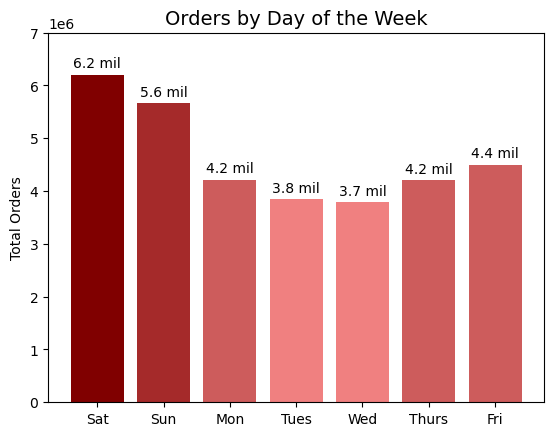

In [7]:
# creating bar chart

order_count = [6204182, 5660230, 4213830, 3840534, 3783802, 4205791, 4496490]
counts1 = ['6.2 mil', '5.6 mil', '4.2 mil', '3.8 mil', '3.7 mil', '4.2 mil', '4.4 mil']
days = ['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
colors1 = ['maroon', 'brown', 'indianred', 'lightcoral', 'lightcoral', 'indianred', 'indianred']

bar = plt.bar(x = days, height = order_count, color = ['maroon', 'brown', 'indianred', 'lightcoral', 'lightcoral', 'indianred', 'indianred'])
plt.ylim(0, 7000000)
plt.title('Orders by Day of the Week', fontsize=14)
plt.bar_label(bar, labels = counts1, padding = 3)
plt.ylabel('Total Orders', fontsize = 10)


In [8]:
# checking counts by hour to edit y axis label on following chart
df_instacart['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

([<matplotlib.axis.YTick at 0x7fc717464b50>,
 [Text(0, 0, '0'),
  Text(0, 500000, '0.5 mil'),
  Text(0, 1000000, '1 mil'),
  Text(0, 1500000, '1.5 mil'),
  Text(0, 2000000, '2 mil'),
  Text(0, 2500000, '2.5 mil'),
  Text(0, 3000000, '3 mil')])

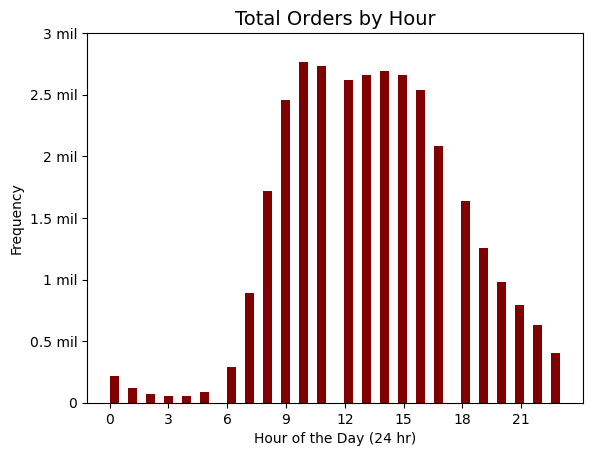

In [9]:
# creating a histogram for the 'order_hour_of_day' column
hist_hour = df_instacart['order_hour_of_day'].plot.hist(bins = 50, color = 'maroon')
plt.title('Total Orders by Hour', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000], ['0', '0.5 mil', '1 mil', '1.5 mil', '2 mil', '2.5 mil', '3 mil'])

In [10]:
# creating mini dataframe of saturday's orders
df_sat = df_instacart.loc[df_instacart['order_day_of_week'] == 0]

([<matplotlib.axis.YTick at 0x7fc717068160>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

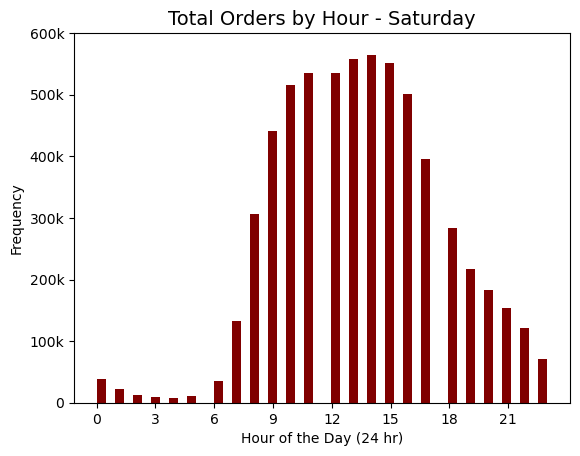

In [11]:
# creating a histogram for saturday's hour of the day
sat_hour = df_sat['order_hour_of_day'].plot.hist(bins = 50, color = 'maroon')
plt.title('Total Orders by Hour - Saturday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

In [12]:
# creating dataframes for the rest of the days of the week
df_sun = df_instacart.loc[df_instacart['order_day_of_week'] == 1]
df_mon = df_instacart.loc[df_instacart['order_day_of_week'] == 2]
df_tues = df_instacart.loc[df_instacart['order_day_of_week'] == 3]
df_wed = df_instacart.loc[df_instacart['order_day_of_week'] == 4]
df_thurs = df_instacart.loc[df_instacart['order_day_of_week'] == 5]
df_fri = df_instacart.loc[df_instacart['order_day_of_week'] == 6]

([<matplotlib.axis.YTick at 0x7fc4ac4d76d0>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

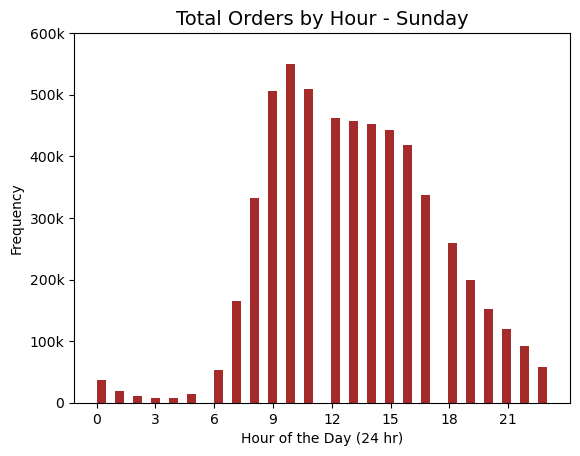

In [13]:
# creating histogram of sunday's orders by hour of the day
sun_hour = df_sun['order_hour_of_day'].plot.hist(bins = 50, color = 'brown')
plt.title('Total Orders by Hour - Sunday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

([<matplotlib.axis.YTick at 0x7fc4a91c2740>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

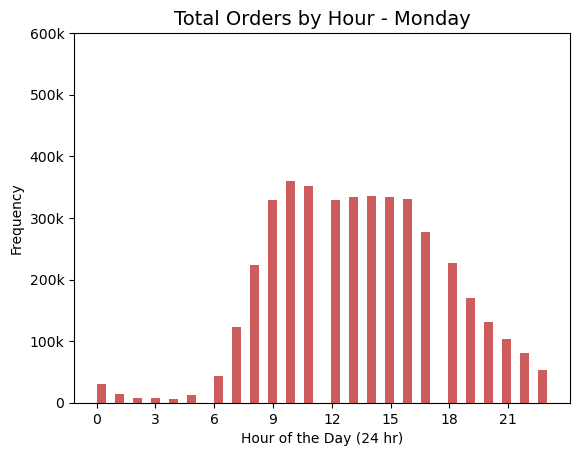

In [14]:
# creating histogram of monday's orders by hour of the day
mon_hour = df_mon['order_hour_of_day'].plot.hist(bins = 50, color = 'indianred')
plt.title('Total Orders by Hour - Monday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

([<matplotlib.axis.YTick at 0x7fc43e9d1840>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

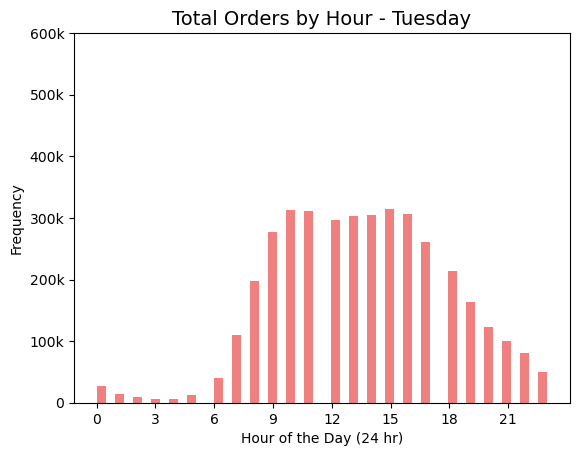

In [15]:
# creating histogram of tuesday's orders by hour of the day
tues_hour = df_tues['order_hour_of_day'].plot.hist(bins = 50, color = 'lightcoral')
plt.title('Total Orders by Hour - Tuesday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

([<matplotlib.axis.YTick at 0x7fc43eab4820>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

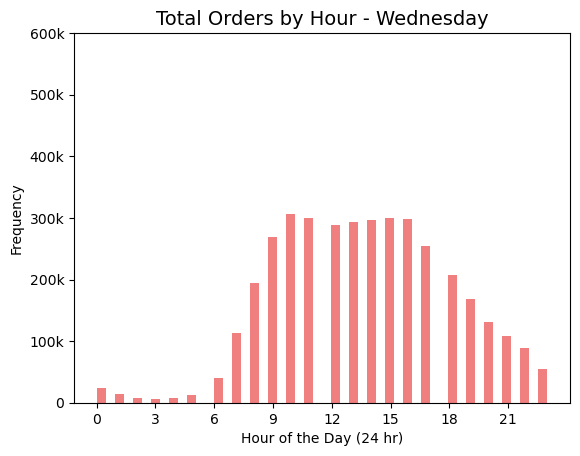

In [16]:
# creating histogram of wednesday's orders by hour of the day
wed_hour = df_wed['order_hour_of_day'].plot.hist(bins = 50, color = 'lightcoral')
plt.title('Total Orders by Hour - Wednesday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

([<matplotlib.axis.YTick at 0x7fc4ab833730>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

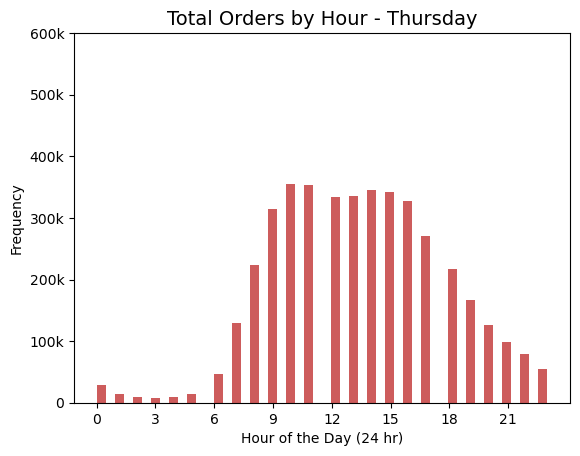

In [17]:
# creating histogram of thursday's orders by hour of the day
thurs_hour = df_thurs['order_hour_of_day'].plot.hist(bins = 50, color = 'indianred')
plt.title('Total Orders by Hour - Thursday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])

([<matplotlib.axis.YTick at 0x7fc43e6664d0>,
 [Text(0, 0, '0'),
  Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k'),
  Text(0, 600000, '600k')])

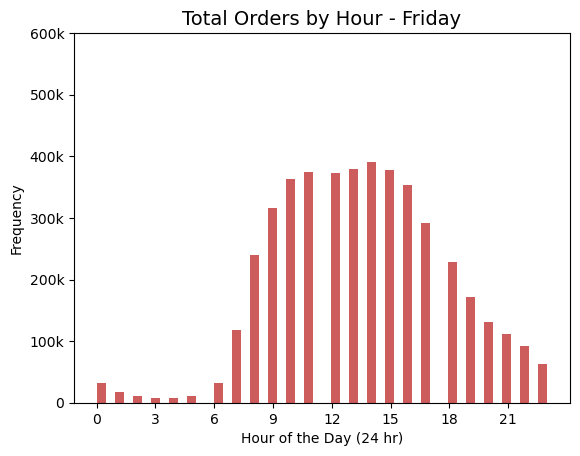

In [18]:
# creating histogram of friday's orders by hour of the day
fri_hour = df_fri['order_hour_of_day'].plot.hist(bins = 50, color = 'indianred')
plt.title('Total Orders by Hour - Friday', fontsize=14)
plt.xlabel('Hour of the Day (24 hr)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100k', '200k', '300k', '400k', '500k', '600k'])